# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [72]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [73]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token("")
# I had to hard code my Mapbox API Key. I have removed it from this uploaded code.

# Import Data

In [74]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [77]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    housing_units_df = sfo_data.groupby("year")["housing_units"].mean()
    housing_units_plot = housing_units_df.plot(kind="bar")
    plt.title("Housing Units in San Francisco from 2010 to 2016")
    plt.xlabel("Year")
    plt.ylabel("Housing Units")
    max_scale = max(housing_units_df) 
    min_scale = min(housing_units_df)
    std_scale = housing_units_df.std()
    plt.ylim(min_scale - std_scale,max_scale + std_scale)
    
    return housing_units_plot
    
    # YOUR CODE HERE!


def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    gross_rent_sale_price_df = sfo_data.groupby("year")["sale_price_sqr_foot", "gross_rent"].mean()
    gross_rent_df = sfo_data.groupby("year")["gross_rent"].mean()
    gross_rent_plot = gross_rent_df.plot(kind="line")
    plt.title("Average Gross Rent in San Francisco")
    plt.xlabel("Year")
    plt.ylabel("Gross Rent")
    # YOUR CODE HERE!
    
    gross_rent_panel = pn.panel(gross_rent_plot)
    return gross_rent_panel


def average_sales_price():
    """Average Sales Price Per Year."""
    sale_price_df = sfo_data.groupby("year")["sale_price_sqr_foot"].mean()
    sale_price_plot = sale_price_df.plot(kind="line")
    plt.title("Average Sale Price per Square Foot in San Francisco")
    plt.xlabel("Year")
    plt.ylabel("Avg. Sale Price")
    
    # YOUR CODE HERE!
    
    sale_price_panel = pn.panel(sale_price_plot)
    return sale_price_panel


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    neighborhood_group = (sfo_data
    .groupby([sfo_data.index, "neighborhood"]).mean().reset_index())
    neighborhood_price_plot = neighborhood_group.hvplot.line(x="year", y="sale_price_sqr_foot", 
    xlabel="Year", ylabel="Avg. Price per Square Foot", groupby="neighborhood")
    
    # YOUR CODE HERE!
    neighborhood_price_panel = pn.panel(neighborhood_price_plot)
    return neighborhood_price_panel

    return neighborhood_price_plot

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    neighborhood_group_expensive = (sfo_data.groupby(["neighborhood"]).mean().sort_values("sale_price_sqr_foot", ascending=False).reset_index())
    neighborhood_group_expensive_ten = neighborhood_group_expensive.iloc[:10]
    neighborhood_ten_plot = neighborhood_group_expensive_ten.hvplot.bar(x="neighborhood", y="sale_price_sqr_foot", 
    xlabel="Neighborhood", ylabel="Avg. Price per Square Foot", rot=90, width=400, height=500)
    # YOUR CODE HERE!

    neighborhood_ten_panel = pn.panel(neighborhood_ten_plot)
    return neighborhood_ten_panel


def parallel_coordinates():
    """Parallel Coordinates Plot."""
    parallel_co_plot = px.parallel_coordinates(neighborhood_group_expensive_ten, color="sale_price_sqr_foot", labels={"neighborhood": "Neighborhood",
    "sale_price_sqr_foot": "Avg. Price per Square Foot", "housing_units": "Housing Units", "gross_rent": "Gross Rent"})
    
    # YOUR CODE HERE!

    parallel_co_panel = pn.panel(parallel_co_plot)
    return parallel_co_panel

def parallel_categories():
    """Parallel Categories Plot."""
    parallel_cat_plot = px.parallel_categories(neighborhood_group_expensive_ten, dimensions=["neighborhood",
    "sale_price_sqr_foot", "housing_units", "gross_rent"], color="sale_price_sqr_foot", 
    color_continuous_scale=px.colors.sequential.Inferno, labels = {"neighborhood": "Neighborhood","sale_price_sqr_foot": "Avg. Price per Square Foot", "housing_units": "Housing Units", "gross_rent": "Gross Rent"})
    # YOUR CODE HERE!

    parallel_cat_panel = pn.panel(parallel_cat_plot)
    return parallel_cat_panel


def neighborhood_map():
    """Neighborhood Map"""
    neighborhood_mean_values = (sfo_data
    .groupby(["neighborhood"]).mean().reset_index())
    neighborhood_mean_values_coor = pd.concat([df_neighborhood_locations, 
    neighborhood_mean_values], axis="columns", join="inner")
    neighborhood_mean_values_coor.drop(columns=["neighborhood"], inplace=True)
    map_1 = px.scatter_mapbox(neighborhood_mean_values_coor, lat="Lat", lon="Lon", color="gross_rent", size="sale_price_sqr_foot", labels = {"Neighborhood":"Neighborhood",
    "sale_price_sqr_foot": "Avg. Price per Square Foot", "gross_rent": "Gross Rent"})
    
    # YOUR CODE HERE!
    
    map_1_panel = pn.panel(map_1)
    return map_1_panel


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

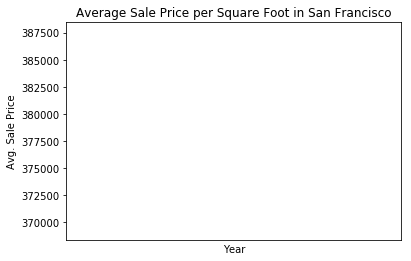

In [86]:
# YOUR CODE HERE!

san_fran_real_estate = pn.Column("# The San Francisco Real Estate Market", "## Use this dashboard to explore different aspects of the San Francisco Real Estate Market","###You can view yearly prices, explore neighborhoods and use interactive visualizations")
yearly_market_analysis = pn.Row(housing_units_per_year(), average_gross_rent(), average_sales_price())
neighborhood_market_analysis = pn.Row(average_price_by_neighborhood(), top_most_expensive_neighborhoods(),neighborhood_map())
parallel_plots_analysis = pn.Row(parallel_coordinates(), parallel_categories())
san_fran_dashboard = pn.Tabs(("San Francisco Real Estate Market", san_fran_real_estate),("Yearly Market Analysis", yearly_market_analysis), ("Neighborhood Market Analysis", neighborhood_market_analysis), ("Parallel Plots", parallel_plots_analysis)) 



## Serve the Panel Dashboard

In [87]:
san_fran_dashboard.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Markdown(str)
    [1] Row
        [0] Str(AxesSubplot)
        [1] Str(AxesSubplot)
        [2] Str(AxesSubplot)
    [2] Row
        [0] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [1] HoloViews(Bars)
        [2] Plotly(Figure)
    [3] Row
        [0] Plotly(Figure)
        [1] Plotly(Figure)